In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [126]:
wine = datasets.load_wine()
x = wine.data[:,[0,1]]
y = wine.target

In [127]:
y[y == 2] = 1

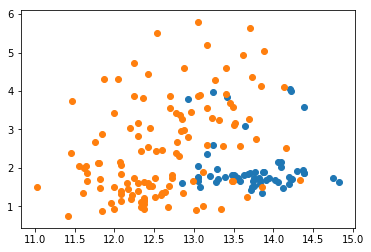

In [128]:
plt.scatter(x[:,0][y == 0.], x[:,1][y == 0.])
plt.scatter(x[:,0][y == 1.], x[:,1][y == 1.])
plt.show()

## Sklearn LogisticRegression

In [129]:
log = LogisticRegression(solver='lbfgs')
log.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [130]:
w0 = log.intercept_[0]
wS = log.coef_[0]

print(f'intercept = {w0}')
print(f'slopes    = {wS}')

intercept = 34.95278774671888
slopes    = [-2.73603846  0.82332767]


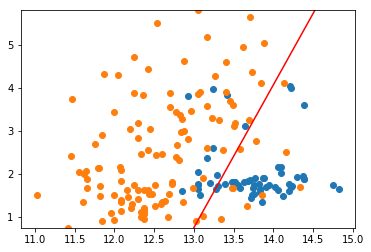

In [132]:
x1 = np.linspace(np.min(x[:,0]), np.max(x[:,0]), num = 10)
y1 = -( wS[0] * x1 + w0)/wS[1]
plt.scatter(x[:,0][y == 0.], x[:,1][y == 0.])
plt.scatter(x[:,0][y == 1.], x[:,1][y == 1.])
plt.plot(x1, y1, '-r')
plt.ylim((np.min(x[:,1]), np.max(x[:,1])))
plt.show()

In [134]:
p = log.predict_proba(x)

## Confusion matrix (sklearn)

In [137]:
confusion_matrix(y, log.predict(x))

array([[ 45,  14],
       [ 11, 108]])

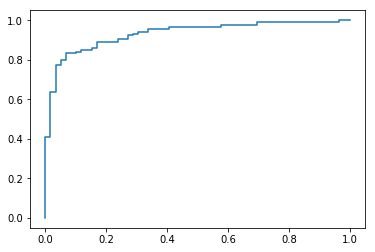

In [149]:
roc = roc_curve(y, p[:,1])
plt.plot(roc[0], roc[1])
plt.show()

In [150]:
roc_auc_score(y,p[:,1])

0.931918530123914

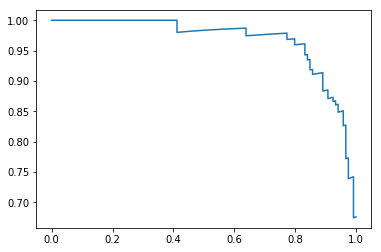

In [154]:
prc = precision_recall_curve(y,p[:,1])
plt.plot(prc[1], prc[0])
plt.show()

## Confusion matrix

In [102]:
class CM:
    
    def __init__(self, y, p, th = 0.5):
        
        self.n = len(y)
        
        self.c = np.zeros(y.shape, dtype=int)
        self.c[p[:,1] >= th] = 1
        
        self.tp = np.sum((y == 1) & (self.c == 1))
        self.fp = np.sum((y == 0) & (self.c == 1))
        self.fn = np.sum((y == 1) & (self.c == 0))
        self.tn = np.sum((y == 0) & (self.c == 0))
        
    def acc(self):
        return (self.tp + self.tn) / self.n
        
    def err(self):
        return (self.fp + self.fn) / self.n

    def precision(self):
        return self.tp / (self.tp + self.fp)

    def recall(self):
        return self.tp / (self.tp + self.fn)

    def sensitivity(self):
        return self.recall()

    def null_err(self):
        p = self.tp + self.fn
        n = self.tn + self.fp
        if p < n: return p / self.n
        else: return n / self.n

    def specificity(self):
        return self.tn / (self.tn + self.fp)

    def fpr(self):
        return 1 - self.specificity()

    def tpr(self):
        return self.recall()

    def cm(self):
        return [[ self.tp, self.fp ],
                [ self.fn, self.tn ]]
    

In [136]:
CM(y, p, 0.5).cm()

[[108, 14], [11, 45]]

In [155]:
roc = []
prc = []
step = .005

for i in np.arange(0,1.1,step):
    cm = CM(y, p, i)
    roc.append([cm.fpr(),cm.tpr()])
    prc.append([cm.recall(),cm.precision()])

roc = np.array(roc)
prc = np.array(prc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars


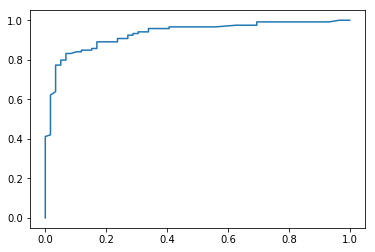

In [156]:
plt.plot(roc[:,0],roc[:,1])
plt.show()

In [177]:
np.sum(roc[:,1]) * step

0.8435714285714286

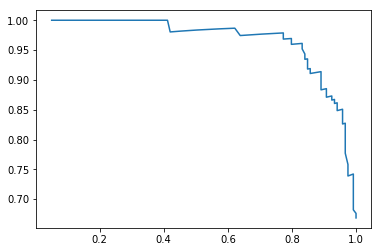

In [158]:
plt.plot(prc[:,0],prc[:,1])
plt.show()

In [159]:
np.sum(prc[:,1][~np.isnan(prc[:,1])]) * step

0.8681892196006649

## Ideal solution

In [208]:
x = np.array([0,1,2,3,4,5,6,7,8,9])[:,np.newaxis]
y = np.array([0,0,0,0,0,1,1,1,1,1])

In [209]:
log = LogisticRegression(solver='lbfgs')
log.fit(x,y)
p = log.predict_proba(x)

In [210]:
confusion_matrix(y, log.predict(x))

array([[5, 0],
       [0, 5]])

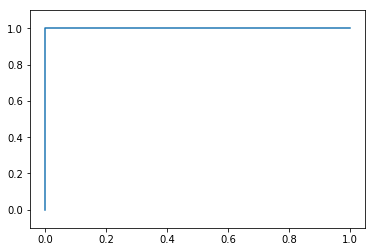

In [214]:
roc = roc_curve(y, p[:,1])
plt.plot(roc[0], roc[1])
plt.ylim([-0.1,1.1])
plt.show()

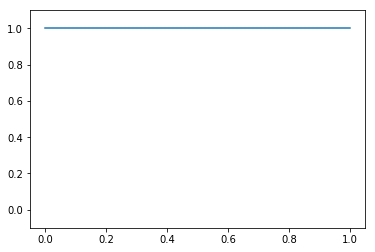

In [215]:
prc = precision_recall_curve(y,p[:,1])
plt.plot(prc[1], prc[0])
plt.ylim([-0.1,1.1])
plt.show()

## Random solution

In [217]:
x = np.array([0,1,2,3,4,5,6,7,8,9])[:,np.newaxis]
y = np.array([0,1,0,1,0,1,0,1,0,1])

In [218]:
log = LogisticRegression(solver='lbfgs')
log.fit(x,y)
p = log.predict_proba(x)

In [219]:
confusion_matrix(y, log.predict(x))

array([[3, 2],
       [2, 3]])

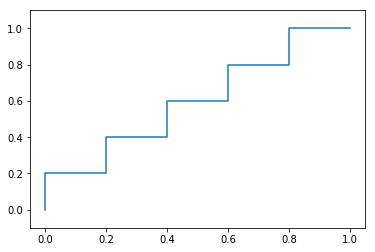

In [220]:
roc = roc_curve(y, p[:,1])
plt.plot(roc[0], roc[1])
plt.ylim([-0.1,1.1])
plt.show()

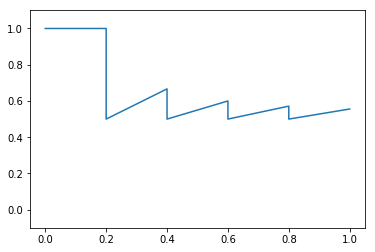

In [221]:
prc = precision_recall_curve(y,p[:,1])
plt.plot(prc[1], prc[0])
plt.ylim([-0.1,1.1])
plt.show()

## Example solution

In [222]:
x = np.array([0,1,2,3,4,5,6,7,8,9])[:,np.newaxis]
y = np.array([0,0,0,1,0,1,0,1,1,1])

In [223]:
log = LogisticRegression(solver='lbfgs')
log.fit(x,y)
p = log.predict_proba(x)

In [224]:
confusion_matrix(y, log.predict(x))

array([[4, 1],
       [1, 4]])

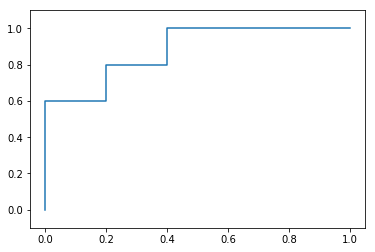

In [225]:
roc = roc_curve(y, p[:,1])
plt.plot(roc[0], roc[1])
plt.ylim([-0.1,1.1])
plt.show()

In [228]:
roc_auc_score(y,p[:,1])

0.88

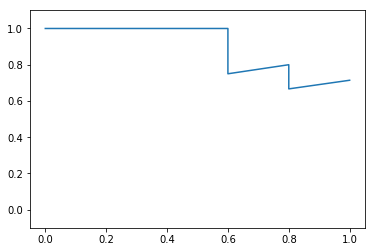

In [227]:
prc = precision_recall_curve(y,p[:,1])
plt.plot(prc[1], prc[0])
plt.ylim([-0.1,1.1])
plt.show()

In [232]:
average_precision_score(y,p[:,1])

0.9028571428571428